# Data and Library Import

In [197]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import miceforest as mf
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import collections

In [198]:
train_df = pd.read_csv('cs-training.csv').drop(columns="Unnamed: 0")
test_df = pd.read_csv("cs-test.csv").drop(columns="Unnamed: 0")

In [199]:
train_df.shape, test_df.shape

((150000, 11), (101503, 11))

In [200]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [201]:
test_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


# Basic EDA to clean data

In [202]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Note that monthly income has missing entries.

In [203]:
train_df["MonthlyIncome"].fillna(train_df["MonthlyIncome"].mean(), inplace=True)
train_df["NumberOfDependents"].fillna(train_df["MonthlyIncome"].mode()[0], inplace=True)
test_df["MonthlyIncome"].fillna(test_df["MonthlyIncome"].mean(), inplace=True)
test_df["NumberOfDependents"].fillna(test_df["MonthlyIncome"].mode()[0], inplace=True)
train_df_imputed = train_df
test_df_imputed = test_df


In [205]:
test_df_imputed

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.081596,70,0,836.000000,0.0,3,0,0,0,0.0
101501,0.335457,56,0,3568.000000,920.0,8,0,2,1,3.0


In [187]:
test_df_imputed.replace(0, np.nan, inplace = True)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0.45377,0.177513,5700.000000,4.0,0.296691,1.013074,0.270317,0.754204
1,0.463295,57,0.45377,0.527237,9141.000000,15.0,0.296691,4.000000,0.270317,2.000000
2,0.043275,59,0.45377,0.687648,5083.000000,12.0,0.296691,1.000000,0.270317,2.000000
3,0.280308,38,1.00000,0.925961,3200.000000,7.0,0.296691,2.000000,0.270317,0.754204
4,1.000000,27,0.45377,0.019917,3865.000000,4.0,0.296691,1.013074,0.270317,1.000000
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0.45377,0.068522,1400.000000,5.0,0.296691,1.013074,0.270317,0.754204
101499,0.922156,36,3.00000,0.934217,7615.000000,8.0,0.296691,2.000000,0.270317,4.000000
101500,0.081596,70,0.45377,836.000000,5615.754411,3.0,0.296691,1.013074,0.270317,0.754204
101501,0.335457,56,0.45377,3568.000000,1949.000000,8.0,0.296691,2.000000,1.000000,3.000000


(array([1.13218e+05, 2.90050e+04, 3.60800e+03, 2.09000e+02, 2.90000e+01,
        5.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

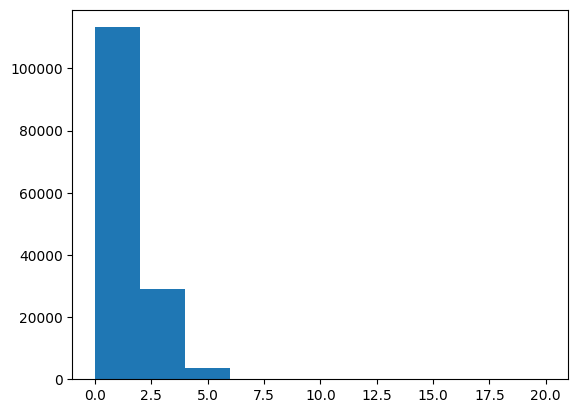

In [155]:
plt.hist(train_df["NumberOfDependents"])

(array([1.16927e+05, 2.92040e+04, 3.62400e+03, 2.09000e+02, 2.90000e+01,
        5.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

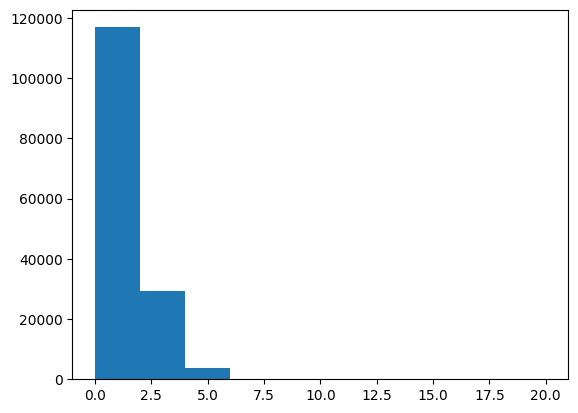

In [156]:
plt.hist(train_df_imputed["NumberOfDependents"])

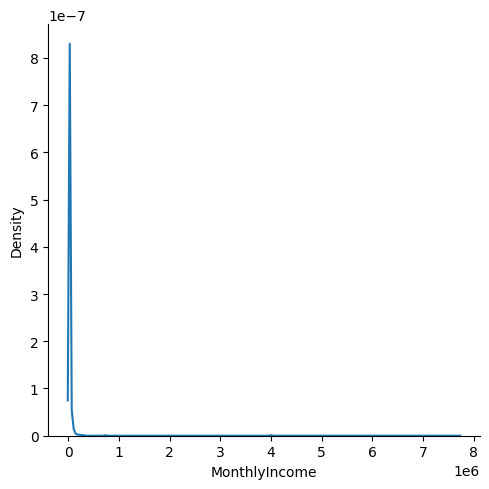

In [157]:
sns.displot(test_df, x = "MonthlyIncome", kind = "kde")

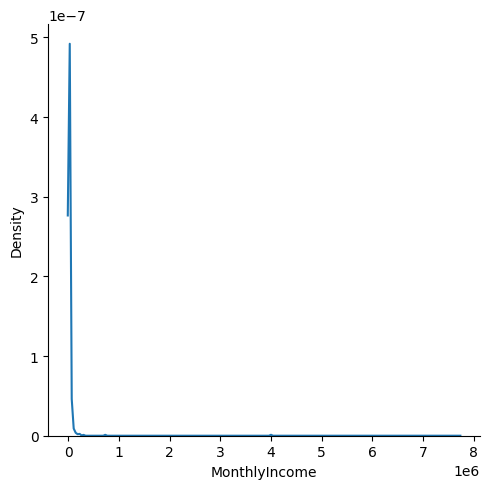

In [158]:
sns.displot(test_df_imputed, x = "MonthlyIncome", kind = "kde")

As seen above, there is no change in the distribution before and after imputation. This is good.

# Outlier removal

In [159]:
upper_arr = np.empty(0)
lower_arr = np.empty(0)
for i in train_df_imputed.columns:
    if i != "SeriousDlqin2yrs":
        upper = np.where(train_df_imputed[i] >= st.mean(train_df_imputed[i]) + (3 * st.stdev(train_df_imputed[i])))
        lower = np.where(train_df_imputed[i] <= st.mean(train_df_imputed[i]) - (3 * st.stdev(train_df_imputed[i])))
        upper_arr = np.append(upper_arr, upper)
        lower_arr = np.append(lower_arr, lower)

drop_idx = np.unique(np.append(upper_arr, lower_arr))

train_no_outlier = train_df_imputed.drop(index = drop_idx)

In [160]:
train_no_outlier.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,1.0,8,0,3,0,0.0


In [161]:
train_df_imputed.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Part 1

## What are the factors that have high correlation with probaility of loan default?

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.012130
age                                    -0.114051
NumberOfTime30-59DaysPastDueNotWorse    0.275049
DebtRatio                              -0.017804
MonthlyIncome                          -0.034758
NumberOfOpenCreditLinesAndLoans        -0.033141
NumberOfTimes90DaysLate                 0.325286
NumberRealEstateLoansOrLines           -0.028614
NumberOfTime60-89DaysPastDueNotWorse    0.271281
NumberOfDependents                      0.048085
Name: SeriousDlqin2yrs, dtype: float64


<AxesSubplot:>

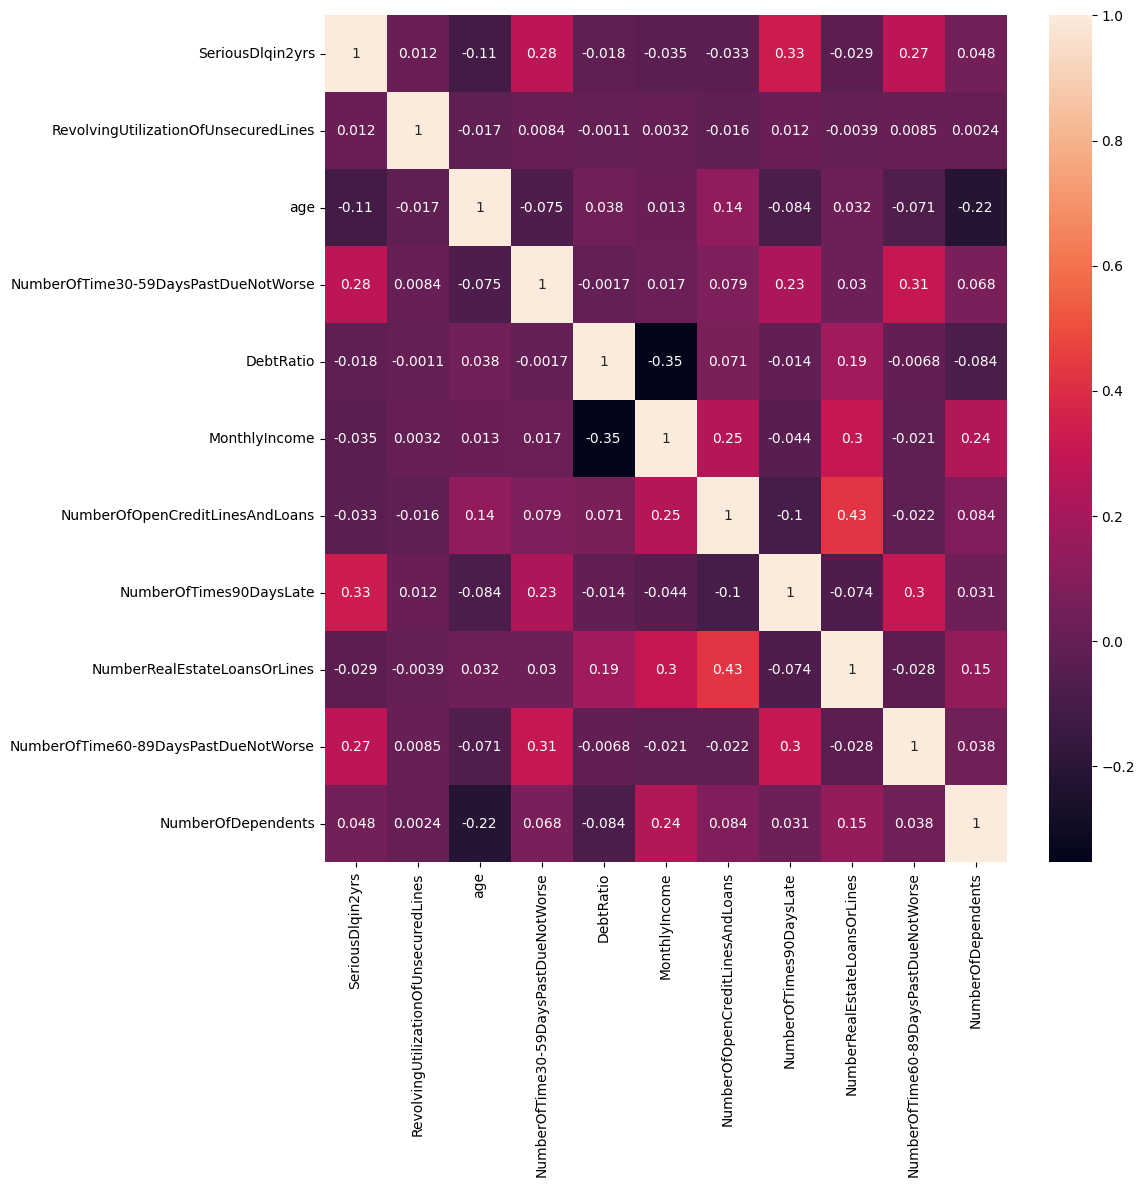

In [162]:
corr_mat = train_no_outlier.corr()
print(corr_mat["SeriousDlqin2yrs"])
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

As seen from the heat map and matrix above, factors that have high correlation with the probability of default are:
1. Number of times 90 days late
2. NumberOfTime30-59DaysPastDueNotWorse
3. NumberOfTime60-89DaysPastDueNotWorse
4. MonthlyIncome
5. Number of dependents
6. Age

## Interaction effects?

As seen from the heat map above there are several factors that are correlated with each other. Note that interaction effect essentially means that the levels (or value) of one independent variable depends on the levels (or value) of another independent variable.

1. Age is negatively correlated with number of dependents. This makes sense as most people start families in their 20s to 30s, which means they will have dependents. As they get older, their children become adults, and thus the number of dependents will decrease.
2. NumberOfTime30-59DaysPastDueNotWorse is positively correlated with NumberOfTime60-89DaysPastDueNotWorse. This makes sense because if one is 30-59 days past due, they are more likely to past due 60-89 days
3. Monthly income is negatively correlated with debt ratio. This makes sense because if one has a higher income, they are less likley to buy things using debt. 
4. NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines are highly positively correlated.
5. NumberOfTimes90dayslate is positively correlated with NumberOfTime60-89DaysPastDueNotWorse. If one is 60-89 days past due, they are more likley to past due 90 days, thus the positive correlation.
6. Monthly income is positively correlated with number of dependents. It makes sense because the more dependents one has, the more they will need to make per month to support them.


## Other Analysis

### Data Scaling

Because the ranges of the variables vary greatly, for example, there are ratios (between 0 and 1) and monthly income (a few thousand). Thus, we must scale the variables

In [163]:
scaler = MinMaxScaler()
t = scaler.fit(train_no_outlier)
train_no_outlier = pd.DataFrame(t.transform(train_no_outlier), columns = train_no_outlier.columns)

In [164]:
train_no_outlier.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.001281,0.253333,0.000000,0.000019,0.057310,0.173913,0.000000,0.00,0.0,0.25
1,0.0,0.000881,0.226667,0.083333,0.000013,0.067053,0.086957,0.083333,0.00,0.0,0.00
2,0.0,0.000313,0.120000,0.000000,0.000006,0.072740,0.217391,0.000000,0.00,0.0,0.00
3,0.0,0.000285,0.706667,0.000000,0.000058,0.077149,0.130435,0.000000,0.25,0.0,0.25
4,0.0,0.000409,0.480000,0.000000,0.883081,0.000022,0.347826,0.000000,0.75,0.0,0.00


### Class balance

Because we are essentially working with a binary classification problem (predicting if one will or will not default on a loan), class imbalance issues can have large effects on the metrics we use and the predictive power of the model. Thus, we seek to investigate the classes, and try to balance them if needed.

In [165]:
counts = collections.Counter(train_no_outlier["SeriousDlqin2yrs"])
print(counts)

Counter({0.0: 135147, 1.0: 9395})


As seen above, the number of negatives (non-defaulted loan) is more than 10x the number of positives (defaulted loan). We must balance these classes, and we will use synthetic minority ondersampling techinique (SMOTE)

In [166]:
import imblearn
over = imblearn.over_sampling.SMOTE()
X_b, Y_b = over.fit_resample(train_no_outlier.drop(columns = "SeriousDlqin2yrs"), train_no_outlier["SeriousDlqin2yrs"])

In [167]:
counts_balanced = collections.Counter(Y_b)
print(counts_balanced)

Counter({0.0: 135147, 1.0: 135147})


In [168]:
len(Y_b)

270294

# Part 2

## Modeling

### Train / Test Split

In [169]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_b, Y_b, test_size = 0.3, shuffle = True)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(189205, 10)
(189205,)
(81089, 10)
(81089,)


### Logistic Regression

This is the most simple of classification algorithm. We will use this to establish a baseline for future models. Note that there is definitely multicolinearity between the predictors, so we will use RFE.

In [170]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

rfe = RFE(estimator = linear_model.LogisticRegression())
rfe.fit(train_X, train_Y)
train_X.columns[rfe.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

In [171]:
selected_features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse']

selected_X = train_X[selected_features]
lr = linear_model.LogisticRegression()
lr.fit(selected_X, train_Y)


LogisticRegression()

In [172]:
print("train acc: ", lr.score(selected_X, train_Y))
print("test acc: ", lr.score(test_X[selected_features], test_Y))

train acc:  0.7356570915144949
test acc:  0.735882795446978


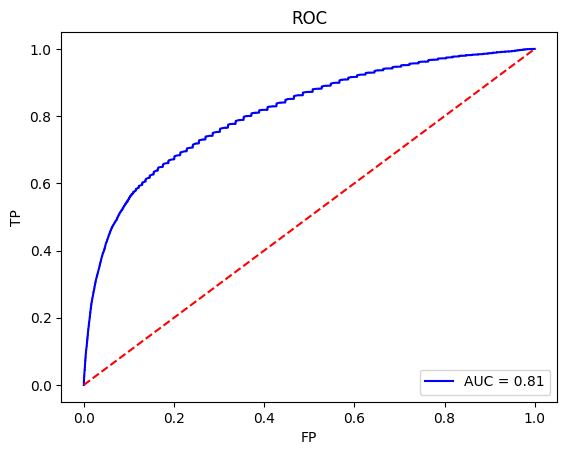

In [173]:
from sklearn import metrics
probs = lr.predict_proba(test_X[selected_features])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TP')
plt.xlabel('FP')
plt.show()


Here, the area under the ROC curve is 0.81 for the test set, which is pretty good.

#### Cross validation

In [174]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, selected_X, train_Y, scoring='roc_auc')
print("Mean CV ROC AUC: ", st.mean(scores))

Mean CV ROC AUC:  0.8131933760888643


As seen above, the cross validated ROC AUC is consistent around 0.81.

#### Metrics

In [175]:
from sklearn.metrics import precision_recall_fscore_support
pred_train = lr.predict(selected_X)
pred_test = lr.predict(test_X[selected_features])
print("precision, recall, f_score, support")
print(precision_recall_fscore_support(y_true = train_Y, y_pred = pred_train, average = "macro"))
print(precision_recall_fscore_support(y_true = test_Y, y_pred = pred_test, average = "macro"))

precision, recall, f_score, support
(0.749867995374187, 0.7357030583312473, 0.7318693272272887, None)
(0.7498089549936962, 0.7357763024142077, 0.7320917701653527, None)


### Random Forest

Random forest classifier is an ensemble learning method (bagging). It usually works pretty well 

#### Making sure data is unchanged

In [176]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
print(selected_X.columns)

(189205, 10)
(189205,)
(81089, 10)
(81089,)
Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')


#### Baseline RF

In [177]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X, train_Y)
print("train acc: ", rf.score(train_X, train_Y))
print("test acc: ", rf.score(test_X, test_Y))

train acc:  0.9998837240030655
test acc:  0.9341094353118179


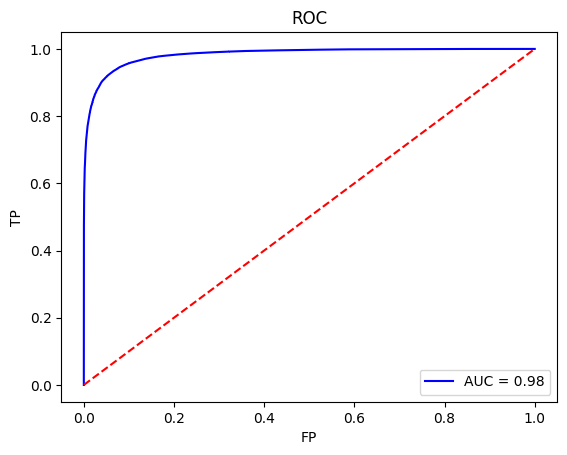

In [178]:
probs = rf.predict_proba(test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_Y, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TP')
plt.xlabel('FP')
plt.show()

Here, the AUC ROC is 0.98, which is better than logistic regression.

#### Metrics

In [179]:
pred_train = rf.predict(train_X)
pred_test = rf.predict(test_X)
print("precision, recall, f_score, support")
print(precision_recall_fscore_support(y_true = train_Y, y_pred = pred_train, average = "macro"))
print(precision_recall_fscore_support(y_true = test_Y, y_pred = pred_test, average = "macro"))

precision, recall, f_score, support
(0.9998837282856607, 0.9998837199073765, 0.9998837239847951, None)
(0.9341121486270405, 0.9341107030435263, 0.9341094141079473, None)


In [180]:
test_X_final = test_df.drop(columns = ['SeriousDlqin2yrs'])
rf.fit(X_b, Y_b)




RandomForestClassifier()

In [181]:
test_X_final = test_df.drop(columns = ['SeriousDlqin2yrs'])
test_df_imputed
pred = rf.predict_proba(test_df_imputed)

In [182]:
p = pd.DataFrame(pred)[1]

In [183]:
df = pd.read_csv('sampleEntry.csv')
df['Probability'] = pred
# df.to_csv('submission.csv')

In [185]:
Id = list(range(1, len(pred)+1))
df = pd.DataFrame({"Id": Id, "Probability": p})
df.to_csv('submission.csv', index = False)

In [186]:
pred

array([[0.73, 0.27],
       [0.82, 0.18],
       [0.82, 0.18],
       ...,
       [0.93, 0.07],
       [0.67, 0.33],
       [0.72, 0.28]])

### Questions

1. The following metrics were used: accuracy, area under ROC curve, precision, and recall. Normally in an imbalanced dataset, accuracy would be a poor metric to use because of the limited information it provides for a model; however, we have balanced the dataset in the beginning, so using accuracy would be appropriate, but it is not the only metric. I also used AUC ROC because it is insensitive to class imbalance. This means that even if the classes of the dependent variable are wildly imbalanced (like the dataset before balancing the classes), it would be a good metric to evaluate the model. 

Precision is defined as the proportion of true positives identified out of all that was predicted positive, and recall is defined as the proportion of true positives identified out of all that should have been predicted positive. These two metrics are important in the business case in this problem (i.e. predicting the probability of someone defaulting a loan). Precision tells us the level of correctness when our model predicts that a person will default on a loan, and recall tells us the ability of the model to correctly identify a person that will default on a loan.

2. AUC stands for area under curve. More specifically, it is the area under the ROC curve (receiver operating characteristic curve). It tells us the tradeoff between true positive rate and false positive rate. We want to maximize the area under ROC curve as it will allow a threshold c such that we can have the highest true positive rate with the lowest false positive rate. AUC was likely used as a metric because of the class imbalance in the dataset. It will not be optimistic like accuracy, which can be biased by the size of the classes. As said above, both precision and recall could be good measures due to their importance in making a business case.

3. I tried logistic regression, random forest, and SVM (not shown). Logistic regression was used to establish a baseline. I tried using all features in creating a classifier, but that proved to overfit on the training data. I used recursive feature selection to select a subset of features and trained a new classifier using the subset. It did pretty well. It was confirmed by cross validation, as the CV accuracy was not far off from training and testing accuracy. I then tried SVM, which proved to be too heavy on computation. This was expected as, under the hood, SVM has to calculate the distance between each point in the dataset, which makes it very slow to run. I scrapped that idea and used a bagging algorithm (random forest) that proved to work well in my past experience. Note that in random forest, I did not do cross validation. This is because by definition of the bagging algorithm, each learner is constructed using a bootstrap sample of the full dataset. 

4. Random forest is a black-box model, which can be very hard to interpret. However, from the logistic regression model and feature selection, we can conclude that            RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse' are good predictors of whether a person will default on a loan.

5. 